# <font color="green">Desafío 3- Predicción de churn</font>

## <font color="green">Descripción</font>

<p>
 En la industria de las telecomunicaciones, la retención de clientes es un desafío clave para las empresas. La fuga de clientes, también conocida como churn, es un problema que puede
 tener un impacto significativo en los ingresos y la reputación de una empresa.
 </p>
 <p>
 Anticiparse a la fuga de clientes y tomar medidas preventivas para retenerlos se ha convertido en una
 prioridad estratégica. En este contexto, el objetivo de esta tarea es utilizar técnicas de
 machine learning para desarrollar un modelo que pueda predecir la probabilidad de fuga de
 clientes en una empresa de telecomunicaciones.
</p>

<hr>

<p>
El objetivo principal de este proyecto es utilizar un enfoque basado en machine learning para construir un modelo predictivo de fuga de clientes.
</p>
<p>
El modelo será capaz de clasificar a los clientes como <b>"fugados"</b> o <b>"nofugados"</b> en función de un conjunto de variables relevantes. El objetivo es proporcionar a la empresa de telecomunicaciones una herramienta eficaz para identificar a los clientes en riesgo de abandonar sus servicios, lo que permitirá tomar medidas proactivas para retenerlos.
</p>

<hr>

<p>
Para lograr este objetivo, se utilizará un conjunto de datos históricos de la base de datos <b><font color="blue">Telco-Customer-Churn.csv</font></b> que contiene información detallada sobre los clientes como la <b>duración de la suscripción</b>, <b>el uso de servicios</b>, <b>los tipos de servicios contratados</b>, <b>el historial de pagos</b> y más.
</p>

<p>Estos datos servirán como base para entrenar y validar el modelo predictivo. Se emplearán diversas técnicas de preprocesamiento de datos, selección de características y entrenamiento de modelos de clasificación como <b>árboles de decisión</b>, <b>Naive Bayes</b> o <b>regresión logística</b>, con el fin de obtener el mejor rendimiento posible.
</p>

<p>
 El resultado final será un modelo de clasificación preciso y confiable, capaz de predecir la probabilidad de fuga de clientes en la empresa de telecomunicaciones. Este modelo permitirá a la empresa identificar y priorizar a los clientes en riesgo, lo que a su vez facilitará la implementación de estrategias específicas de retención de clientes. Además, se espera que el proyecto proporcione una comprensión más profunda de los factores y las variables que influyen en la fuga de clientes en la industria de las telecomunicaciones.
</p>

<hr>

<p>
 En resumen, este proyecto tiene como objetivo principal aplicar técnicas de machine learning para desarrollar un modelo predictivo de fuga de clientes en la industria de las telecomunicaciones. El modelo resultante permitirá identificar a los clientes en riesgo de abandonar los servicios de la empresa y tomar acciones preventivas para retenerlos. A través de este enfoque, se busca mejorar la retención de clientes, aumentar la satisfacción y mejorar el rendimiento general de la empresa en un entorno altamente competitivo.
</p>

1. Realizar un análisis exploratorio de los datos para comprender las características y la
 distribución de los datos.
 (2 Puntos)


In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [88]:
df = pd.read_excel('Telco-Customer-Churn.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [89]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [90]:
#contaremos los null
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [91]:
#transormare los nulls de la tabla TotalCharges al media de la misma
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [92]:
df["TotalCharges"].isnull().sum()

np.int64(0)

 2. Preprocesar los datos, incluyendo la limpieza, la transformación y la normalización
 de las características según sea necesario.
 (1 Puntos)


In [93]:
cat_cols = df.select_dtypes(include=['object']).columns

In [94]:
df = pd.get_dummies(df, columns=cat_cols.drop('Churn'), drop_first=True)

In [95]:
X = df.drop('Churn', axis=1)
y = df['Churn'].map({'No': 0, 'Yes': 1})  # convertir etiqueta a 0 y 1

In [96]:
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [97]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


3. Dividir los datos en conjuntos de entrenamiento y prueba.
 (1 Puntos)


In [98]:
#hacer train test split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

4. Entrenar al menos 3 algoritmos y optimizar sus hiperparametros
 (4 Puntos)


In [99]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score,
                             classification_report,
                             confusion_matrix)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# <font color="darkred">Knn</font>

In [100]:
#buscamos el mejor hiper parametro K con GridSearchCV

knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

grid = GridSearchCV(
    knn,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]}, scoring='accuracy')

In [101]:
print(f"Mejor hiperparámetro: {grid.best_params_}")
print(f"Mejor puntuación de validación cruzada: {grid.best_score_}")

Mejor hiperparámetro: {'n_neighbors': 11}
Mejor puntuación de validación cruzada: 0.7767109902112054


In [102]:
best_knn = grid.best_estimator_
best_knn.fit(X_train, y_train)

y_pred = best_knn.predict(X_test)

In [103]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.794889992902768
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.48      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409

[[942  94]
 [195 178]]


### El modelo predijo correctamente que clientes no se fueron 942

### Predijo correctamente a los que si se fueron 178

### Se fueron, pero el modelo dijo que no se iban 195

### Se quedaron, pero el modelo dijo que se iban 94

# <font color="darkgreen">Arbol</font>

In [104]:
param_grid = {
    'max_depth': [3, 5, 7, 9, 10 ,13],
    'min_samples_leaf': [1, 3, 5, 7, 9],
    'min_samples_split': [2, 5, 7, 10]
}

tree = DecisionTreeClassifier()
grid = GridSearchCV(
    tree,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9, 10, 13],
                         'min_samples_leaf': [1, 3, 5, 7, 9],
                         'min_samples_split': [2, 5, 7, 10]},
             scoring='accuracy')

In [105]:
print("Mejores parámetros:", grid.best_params_)
print("Mejor accuracy promedio:", grid.best_score_)

Mejores parámetros: {'max_depth': 5, 'min_samples_leaf': 9, 'min_samples_split': 2}
Mejor accuracy promedio: 0.7864753562248129


In [106]:
best_tree = grid.best_estimator_
best_tree.fit(X_train, y_train)
y_pred = best_tree.predict(X_test)

In [107]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8076650106458482
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1036
           1       0.71      0.46      0.56       373

    accuracy                           0.81      1409
   macro avg       0.77      0.70      0.72      1409
weighted avg       0.80      0.81      0.79      1409

[[966  70]
 [201 172]]


### El modelo predijo a los que no se fueron 966

### El modelo predijo a los que no si fueron 172

### Se fueron, pero el modelo dijo que no se iban 201

### Se quedaron, pero el modelo dijo que se iban 70

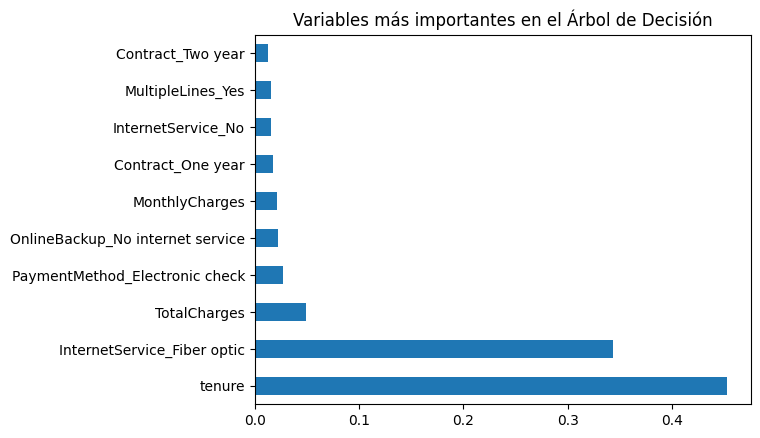

In [108]:

importances = pd.Series(best_tree.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Variables más importantes en el Árbol de Decisión")
plt.show()

# El modelo predice en base al servicio de fibra optica, debe ser por la velocidad de internet y por el edificio en donde se da el servicio como oficinas. ambos factores son los que mas afectan si un cliente se va o se queda.

# <font color="darkblue">Logistic Regression</font>

In [109]:

logreg = LogisticRegression(max_iter=1000)

In [110]:
cv_scores = cross_val_score(logreg, X_train, y_train, cv=5, scoring='accuracy')
print("Accuracy promedio (CV):", cv_scores.mean())

Accuracy promedio (CV): 0.7834580244948393


In [111]:
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [112]:
print("Accuracy test:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy test: 0.8126330731014905
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1036
           1       0.64      0.68      0.66       373

    accuracy                           0.81      1409
   macro avg       0.76      0.77      0.76      1409
weighted avg       0.82      0.81      0.81      1409

[[893 143]
 [121 252]]


### El modelo predijo a los que no se fueron 893
### El modelo predijo a los que no si fueron 252
### Se fueron, pero el modelo dijo que no se iban 121
###Se quedaron, pero el modelo dijo que se iban 143.

esto es muy diferente a los modelos anteriores.
knn y arbol parecen dar resultados mas precisos por la similitud de sus resultados.